In [193]:
# Import Libraries for the project
from sklearn.linear_model import LinearRegression # Imported for Linear Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd # Import pandas
import numpy as np # Import numpy
import matplotlib.pyplot as plt # For data visualization
from sklearn.model_selection import train_test_split  # for train_test_split function
from sklearn.metrics import accuracy_score  #  for accuracy calculation
from sklearn.metrics import cohen_kappa_score # for kappa calculation

In [194]:
data = pd.read_csv("CE802_P3_Data/CE802_P3_Data.csv") # Imported the dataset using pandas

In [195]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,Low,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,USA,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,High,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,UK,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,Very high,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,USA,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,High,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,Europe,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,Low,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,Europe,5115.03,789.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,High,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,Europe,3759.72,722.07,2952.31
1496,0.96,3,48.70,91.20,-3.68,Medium,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,UK,5409.42,987.69,0.00
1497,7.89,3,57.82,-65.46,-1.72,Medium,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,USA,4109.13,688.32,23.73
1498,3.75,5,59.36,78.69,-3.43,Low,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,Rest,4671.33,561.90,0.00


In [196]:
data.info() # to see what type of data we have here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   object 
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [197]:
data.isnull().sum() # to see if any NA values

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

In [198]:
data['F6'].unique() # to see the unique values

array(['Low', 'High', 'Very high', 'Medium', 'Very low'], dtype=object)

In [199]:
data['F14'].unique() # to see the unique values

array(['USA', 'UK', 'Europe', 'Rest'], dtype=object)

In [200]:
def replace_country(a,b):
    data.F14.replace(a,b,inplace=True)
replace_country('USA',1)
replace_country('UK',2)
replace_country('Europe',3)
replace_country('Rest',4)

In [201]:
data.F14

0       1
1       2
2       1
3       3
4       3
       ..
1495    3
1496    2
1497    1
1498    4
1499    1
Name: F14, Length: 1500, dtype: int64

In [202]:
def replace_cF6(a,b):
    data.F6.replace(a,b,inplace=True)
replace_cF6('Low',1)
replace_cF6('High',2)
replace_cF6('Very high',3)
replace_cF6('Medium',4)
replace_cF6('Very low',5)

In [203]:
data.F6

0       1
1       2
2       3
3       2
4       1
       ..
1495    2
1496    4
1497    4
1498    1
1499    4
Name: F6, Length: 1500, dtype: int64

In [204]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,1,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,1,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,2,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,2,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,3,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,1,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,2,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,3,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,1,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,3,5115.03,789.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,2,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,3,3759.72,722.07,2952.31
1496,0.96,3,48.70,91.20,-3.68,4,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,2,5409.42,987.69,0.00
1497,7.89,3,57.82,-65.46,-1.72,4,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,1,4109.13,688.32,23.73
1498,3.75,5,59.36,78.69,-3.43,1,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,4,4671.33,561.90,0.00


In [205]:
train_data_x = data.iloc[:,:16] # splitted data for the features
train_data_y = data.iloc[:, 16] # Splitted for the Target column Class
x_train, x_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size = 0.2, random_state = 10) # Splitting the data

In [206]:
LRO = LinearRegression() # creating linear regressor object
LRO = LRO.fit(x_train,y_train) #feeding the model
LRScore1 = LRO.score(x_test,y_test)
print("Score:", LRScore1)

Score: 0.6789168904393641


In [207]:
GBO = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls') # creating Gradient Boosting Regressor object
GBO = GBO.fit(x_train,y_train) #feeding the model
GBScore1 = GBO.score(x_test,y_test)
print("Score:", GBScore1)

Score: 0.8164604167727227


In [208]:
RFO = RandomForestRegressor(n_jobs=1, oob_score=True) # creating Random Forest Regressor object
RFO = RFO.fit(x_train,y_train) #feeding the model
RFScore1 = RFO.score(x_test,y_test)
print("Score:", RFScore1)

Score: 0.6770847115136522


In [209]:
# Filling zero of Target column with the mean values
data['Target']=data['Target'].replace(0,data['Target'].mean())

In [210]:
train_data_x = data.iloc[:,:16] # splitted data for the features
train_data_y = data.iloc[:, 16] # Splitted for the Target column Class
x_train, x_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size = 0.2, random_state = 10) # Splitting the data

In [211]:
LRO = LinearRegression() # creating linear regressor object
LRO = LRO.fit(x_train,y_train) #feeding the model
LRScore2 = LRO.score(x_test,y_test)
print("Score:", LRScore2)

Score: 0.4203527219307589


In [212]:
GBO = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls') # creating Gradient Boosting Regressor object
GBO = GBO.fit(x_train,y_train) #feeding the model
GBScore2 = GBO.score(x_test,y_test)
print("Score:", GBScore2)

Score: 0.66522042679068


In [213]:
RFO = RandomForestRegressor(n_jobs=1, oob_score=True) # creating Random Forest Regressor object
RFO = RFO.fit(x_train,y_train) #feeding the model
RFScore2 = RFO.score(x_test,y_test)
print("Score:", RFScore2)

Score: 0.5803909303022915


In [214]:
data = pd.read_csv("CE802_P3_Data/CE802_P3_Data.csv") # To get the original data back

In [215]:
# Changing Objet data to integer
def replace_country(a,b):
    data.F14.replace(a,b,inplace=True)
replace_country('USA',1)
replace_country('UK',2)
replace_country('Europe',3)
replace_country('Rest',4)

def replace_cF6(a,b):
    data.F6.replace(a,b,inplace=True)
replace_cF6('Low',1)
replace_cF6('High',2)
replace_cF6('Very high',3)
replace_cF6('Medium',4)
replace_cF6('Very low',5)


In [216]:
#Filling zero with the median values
data['Target']=data['Target'].replace(0,data['Target'].median())

In [217]:
train_data_x = data.iloc[:,:16] # splitted data for the features
train_data_y = data.iloc[:, 16] # Splitted for the Target column Class
x_train, x_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size = 0.2, random_state = 10) # Splitting the data

In [218]:
LRO = LinearRegression() # creating linear regressor object
LRO = LRO.fit(x_train,y_train) #feeding the model
LRScore3 = LRO.score(x_test,y_test)
print("Score:", LRScore3)

Score: 0.582917845939992


In [219]:
GBO = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls') # creating Gradient Boosting Regressor object
GBO = GBO.fit(x_train,y_train) #feeding the model
GBScore3 = GBO.score(x_test,y_test)
print("Score:", GBScore3)

Score: 0.7807023724003607


In [220]:
RFO = RandomForestRegressor(n_jobs=1, oob_score=True) # creating Random Forest Regressor object
RFO = RFO.fit(x_train,y_train) #feeding the model
RFScore3 = RFO.score(x_test,y_test)
print("Score:", RFScore3)

Score: 0.6323511719057406


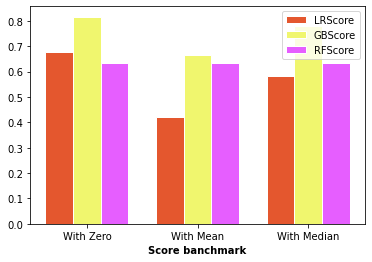

In [235]:
# Creating a plot to see the difference with the approach for DT
LRScore = [LRScore1,LRScore2,LRScore3] # accuracy without F15, with F15 filled with mean, with F15 filled with zero
GBScore = [GBScore1,GBScore2, GBScore3]# Kappa without F15, with F15 filled with mean, with F15 filled with zero
RFScore = [RFScore3,RFScore3, RFScore3]
labels = ['With Zero', 'With Mean', 'With Median']
barplotWidth = 0.25
r1 = np.arange(len(LRScore))
r2 = [x + barplotWidth for x in r1]
r3 = [x + barplotWidth for x in r2]
plt.bar(r1, LRScore, color='#E4572E', width=barplotWidth, edgecolor='white', label='LRScore')
plt.bar(r2, GBScore, color='#F0F66E', width=barplotWidth, edgecolor='white', label='GBScore')
plt.bar(r3, RFScore, color='#E65EFF', width=barplotWidth, edgecolor='white', label='RFScore')
plt.xlabel('Score banchmark', fontweight='bold')
plt.xticks([r + barplotWidth for r in range(len(LRScore))], labels)
plt.legend()
plt.show()

In [236]:
test = pd.read_csv('CE802_P3_Data/CE802_P3_Test.csv')  # Calling the test file

In [237]:
# Changing the strings to integers
def replace_country(a,b):
    test.F14.replace(a,b,inplace=True)
replace_country('USA',1)
replace_country('UK',2)
replace_country('Europe',3)
replace_country('Rest',4)
def replace_cF6(a,b):
    test.F6.replace(a,b,inplace=True)
replace_cF6('Low',1)
replace_cF6('High',2)
replace_cF6('Very high',3)
replace_cF6('Medium',4)
replace_cF6('Very low',5)

In [241]:
# Splitting the dataset
train_data_x = test.iloc[:,:16] # split dataset in features and target variable
train_data_y = test.iloc[:, 16]

In [242]:
TargetPredict = GBO.predict(train_data_x)

In [252]:
TargetPredict

array([1823.095819  ,  340.64971119, 1316.72191538, ..., 1551.46493956,
        802.50822155, 1042.8450372 ])

In [248]:
#Added the predictions to the columns target
test['Target'] = ClassPredict

In [249]:
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,19.62,4,64.06,43.65,-3.45,3,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,4,2833.83,630.81,1985.694892
1,8.91,3,0.00,-29.13,-5.45,1,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,3,5011.47,623.01,208.106255
2,8.55,2,0.94,175.35,-4.77,2,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,2,3835.32,684.15,1325.892550
3,26.73,3,1.86,163.71,-6.74,1,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,2,2372.91,777.60,2027.594138
4,5.52,5,6.74,298.77,-8.34,1,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,4,5324.61,724.44,1206.054160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.84,3,6.76,178.83,-4.45,2,4.82,-2487.90,-14300.95,-248.86,3.97,-32.06,8,1,4696.83,579.36,1308.654036
1496,14.67,4,217.94,136.71,-2.16,1,5.24,-3589.92,-17406.68,-217.44,10.18,-30.12,6,1,3952.08,747.75,1173.284676
1497,12.96,4,18.88,210.78,1.85,5,0.60,-3147.93,-14315.11,-199.28,9.19,-23.96,8,3,4269.81,794.01,1302.919999
1498,14.22,7,0.68,177.42,-3.61,5,1.39,-3273.96,-10592.68,-139.00,8.26,-21.26,0,2,4401.87,772.29,478.631362


In [253]:
#Changing F6 and F14 columns to original values
def replace_country(a,b):
    test.F14.replace(a,b,inplace=True)
replace_country(1,'USA')
replace_country(2,'UK')
replace_country(3,'Europe')
replace_country(4,'Rest')
def replace_cF6(a,b):
    test.F6.replace(a,b,inplace=True)
replace_cF6(1,'Low')
replace_cF6(2,'High')
replace_cF6(3,'Very high')
replace_cF6(4,'Medium')
replace_cF6(5,'Very low')

In [259]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,19.62,4,64.06,43.65,-3.45,Very high,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,Rest,2833.83,630.81,1985.694892
1,8.91,3,0.00,-29.13,-5.45,Low,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,Europe,5011.47,623.01,208.106255
2,8.55,2,0.94,175.35,-4.77,High,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,UK,3835.32,684.15,1325.892550
3,26.73,3,1.86,163.71,-6.74,Low,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,UK,2372.91,777.60,2027.594138
4,5.52,5,6.74,298.77,-8.34,Low,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,Rest,5324.61,724.44,1206.054160


In [260]:
#Replaced the CE802_P2_Test.csv file
test.to_csv('CE802_P3_Test.csv')